Personal Finance Advisor, AI Tutor, AI Research Assistant, AI Therapist, Recipe Generator, AI Personal Assistant

In [2]:
# Core Langchain and LangGraph packages
!pip install langchain langgraph langchain_core langchain_community

# Model providers and integrations
!pip install langchain_openai langchain_groq langchain_huggingface

# Utilities and tools
!pip install faiss-cpu python-dotenv tqdm chromadb duckduckgo pyppeteer


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.9/154.9 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 33.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.2/44.2 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.0/50.0 kB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.5/216.5 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.4/63.4 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.3/438.3 kB 24.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.

In [3]:
from langgraph.graph import StateGraph
from langchain_core.messages import HumanMessage
from typing_extensions import TypedDict
from typing import Annotated
from langgraph.graph.message import add_messages

from typing import TypedDict, List

# Define the state
from typing import Optional


In [4]:
from google.colab import userdata
import os
GROQ_API_KEY = userdata.get('GROQ_API_KEY')
TAVILY_API_KEY = userdata.get('TAVILY_API_KEY')

os.environ["GROQ_API_KEY"] = GROQ_API_KEY
os.environ["TAVILY_API_KEY"] = TAVILY_API_KEY

In [5]:
from langchain_groq import ChatGroq
llm = ChatGroq(
    model="DeepSeek-R1-Distill-Llama-70b",
    temperature=0.7,
    streaming=True,
    verbose=True
)

In [6]:
from typing import TypedDict, List, Literal, Optional, Union


class Message(TypedDict):
    role: Literal["user", "assistant"]
    content: str


class CustomerData(TypedDict, total=False):
    name: str
    order_id: str
    order_status: str


class ApiResult(TypedDict, total=False):
    tracking_link: str


class SupportState(TypedDict):
    messages: List[Message]
    intent: Optional[str]
    retrieved_docs: Optional[str]
    customer_data: Optional[CustomerData]
    api_result: Optional[ApiResult]
    response: Optional[str]
    follow_up_needed: bool


In [7]:
from typing import TypedDict, List, Literal, Optional, Union
from typing_extensions import Annotated
from langchain_core.messages import HumanMessage, AIMessage
from langgraph.graph.message import add_messages

class Message(TypedDict):
    role: Literal["user", "assistant"]
    content: str

class CustomerData(TypedDict, total=False):
    user_id: str
    name: str
    latest_order_id: str

class ApiResult(TypedDict, total=False):
    order_id: str
    status: str
    estimated_delivery: str
    tracking_url: str
    eligible: bool
    instructions: str
    ticket_id: str
    message: str

class SupportState(TypedDict):
    messages: Annotated[List[Union[HumanMessage, AIMessage]], add_messages]
    intent: Optional[str]
    retrieved_docs: Optional[List[dict]]
    customer_data: Optional[CustomerData]
    api_result: Optional[ApiResult]
    response: Optional[str]
    follow_up_needed: bool


In [8]:
# !pip install faiss-cpu

In [9]:
from langchain_groq import ChatGroq
llm = ChatGroq(
    model="DeepSeek-R1-Distill-Llama-70b",
    temperature=0.7,
    streaming=True,
    verbose=True
)

In [10]:
def user_message_node(state: SupportState) -> dict:
    if not state.get("messages"):
        return {"error": "No user message found."}
    last_message = state["messages"][-1].content
    return {"user_message": last_message}

In [11]:
def classify_intent_node(state: SupportState) -> dict:
    # Get the latest user message
    question = state["messages"][-1].content

    # Prompt for classification
    prompt = f"""Classify the following customer message into one of the intents:
    [support, order_status, refund, escalate, unknown].

    Message: "{question}"

    Intent:"""

    # Predict intent
    intent = llm.predict(prompt).strip().lower()
def classify_intent_node(state: SupportState) -> dict:
    question = state["messages"][-1].content
    prompt = f"""Analyze this customer message and classify into ONE intent:
    - order_status: Questions about order tracking, delivery status, or shipment
    - refund: Returns, refunds, exchanges, or cancellation requests
    - support: General help, policy questions, or documentation requests
    - escalate: Demands to speak with human, manager, or supervisor

    Return ONLY the lowercase intent name from: [order_status, refund, support, escalate]

    Examples:
    "Where is my package?" → order_status
    "I need to return these shoes" → refund
    "What's your return policy?" → support
    "Let me talk to a manager" → escalate

    Message: "{question}"
    Intent:"""

    raw_intent = llm.invoke(prompt).content.strip().lower()
    print(f"Raw classifier output: '{raw_intent}'")  # Debug logging

    # Flexible matching
    intent_map = {
        "order": "order_status",
        "status": "order_status",
        "track": "order_status",
        "deliver": "order_status",
        "return": "refund",
        "refund": "refund",
        "exchange": "refund",
        "cancel": "refund",
        "help": "support",
        "policy": "support",
        "how to": "support",
        "human": "escalate",
        "manager": "escalate",
        "supervisor": "escalate"
    }

    # Find first matching keyword
    for keyword, intent in intent_map.items():
        if keyword in raw_intent:
            return {"intent": intent}

    return {"intent": "unknown"}

    # Return updated state
    return {"intent": intent}


In [12]:
def fetch_customer_data_node(state: SupportState) -> dict:
    user_message = state["messages"][-1].content

    # Mock: Extract user ID or lookup from message context
    customer_data = {
        "user_id": "12345",
        "name": "John Doe",
        "latest_order_id": "ORD-6789"
    }
    return {"customer_data": customer_data}


In [13]:
def call_order_api_node(state: SupportState) -> dict:
    order_id = state["customer_data"]["latest_order_id"]

    # Mock API result
    api_result = {
        "order_id": order_id,
        "status": "shipped",
        "estimated_delivery": "2025-05-27",
        "tracking_url": "https://tracker.com/ORD-6789"
    }
    return {"api_result": api_result}


In [14]:
def check_refund_eligibility_node(state: SupportState) -> dict:
    order_id = state["customer_data"]["latest_order_id"]

    # Mock logic
    refund_info = {
        "eligible": True,
        "instructions": "Please visit your order page and click 'Request Refund'."
    }
    return {"api_result": refund_info}


In [15]:
def retrieve_support_docs_node(state: SupportState) -> dict:
    query = state["messages"][-1].content

    # Mock RAG-style retrieval
    docs = [
        {"title": "Shipping Policy", "content": "Orders ship in 2-3 days..."},
        {"title": "Tracking Orders", "content": "Use the tracking link sent via email..."}
    ]
    return {"retrieved_docs": docs}


In [16]:
import csv
import os
from datetime import datetime

def escalate_to_human_node(state: SupportState) -> dict:
    message = state["messages"][-1].content
    user_id = state.get("customer_data", {}).get("user_id", "unknown")

    # Simulate 3rd-party ticket creation
    ticket_id = f"TICKET-{datetime.utcnow().strftime('%Y%m%d%H%M%S')}"
    ticket_data = {
        "ticket_id": ticket_id,
        "user_id": user_id,
        "message": message,
        "status": "submitted",
        "timestamp": datetime.utcnow().isoformat()
    }

    # CSV file path
    csv_file = "support_tickets.csv"
    file_exists = os.path.isfile(csv_file)

    # Write ticket to CSV
    with open(csv_file, mode='a', newline='') as file:
        writer = csv.DictWriter(file, fieldnames=ticket_data.keys())

        if not file_exists:
            writer.writeheader()
        writer.writerow(ticket_data)

    # Return result to LangGraph
    return {
        "api_result": {
            "ticket_id": ticket_id,
            "status": "submitted",
            "message": f"Your request has been escalated to a human agent. Ticket ID: {ticket_id}"
        }
    }


In [17]:
def handle_unknown_intent_node(state: SupportState) -> dict:
    return {
        "response": "I'm sorry, I didn't quite understand your request. Could you please rephrase?"
    }


In [18]:
def follow_up_node(state: SupportState) -> dict:
    # Basic logic — can be LLM-enhanced later
    follow_up_needed = "anything else" in state["messages"][-1].content.lower()
    return {"follow_up_needed": follow_up_needed}


In [67]:
def fetch_refund_details_node(state: SupportState) -> dict:
    order_id = state["customer_data"]["latest_order_id"]
    refund_info = {
        "order_id": order_id,
        "status": "pending",
        "amount": "$100.00",
        "reason": "Item was damaged"
    }
    return {"api_result": refund_info}

In [19]:
def generate_response_node(state: SupportState) -> dict:
    intent = state["intent"]

    if intent == "order_status":
        result = state["api_result"]
        response = f"Your order {result['order_id']} is currently *{result['status']}* and expected by {result['estimated_delivery']}. Track it here: {result['tracking_url']}"
    elif intent == "refund":
        result = state["api_result"]
        if result["eligible"]:
            response = f"Your order is eligible for a refund. {result['instructions']}"
        else:
            response = "Unfortunately, your order is not eligible for a refund at this time."
    elif intent == "support":
        docs = state["retrieved_docs"]
        summaries = "\n".join([f"- {doc['title']}: {doc['content'][:100]}..." for doc in docs])
        response = f"Here’s what I found that might help:\n{summaries}"
    elif intent == "escalate":
        response = state["api_result"]["message"]
    else:
        response = state["response"]  # from HandleUnknownIntent

    return {"response": response}


In [20]:

# Conditional routing based on intent
def route_by_intent(state: SupportState) -> str:
    intent = state["intent"]
    if intent == "order_status":
        return "order_status"
    elif intent == "refund":
        return "refund"
    elif intent == "support":
        return "support"
    elif intent == "escalate":
        return "escalate"
    else:
        return "unknown"


In [72]:
from langgraph.graph import StateGraph, END, START
graph_builder = StateGraph(SupportState)

# # Add nodes
graph_builder.add_node("UserMessage", user_message_node)
graph_builder.add_node("ClassifyIntent", classify_intent_node)
graph_builder.add_node("FetchCustomerData", fetch_customer_data_node)
graph_builder.add_node("FetchRefundDetails", fetch_refund_details_node)
graph_builder.add_node("RetrieveSupportDocs", retrieve_support_docs_node)
graph_builder.add_node("EscalateToHuman", escalate_to_human_node)
graph_builder.add_node("HandleUnknownIntent", handle_unknown_intent_node)
graph_builder.add_node("CallOrderApi", call_order_api_node)
graph_builder.add_node("GenerateResponse", generate_response_node)
graph_builder.add_node("FollowUp", follow_up_node)


# # Set up edges (same as before)
graph_builder.set_entry_point("UserMessage")
graph_builder.add_edge("UserMessage", "ClassifyIntent")

graph_builder.add_conditional_edges("ClassifyIntent", route_by_intent,
                                    {
                                        "support": "RetrieveSupportDocs",
                                        "escalate": "EscalateToHuman",
                                        "unknown": "HandleUnknownIntent",
                                        "order_status": "FetchCustomerData",
                                        # "refund": "FetchCustomerData",
                                        "refund" : "FetchRefundDetails"
                                    })
# Add edge from FetchCustomerData to CallOrderApi for order_status
graph_builder.add_edge("FetchCustomerData", "CallOrderApi")
# Add edge from CallOrderApi to GenerateResponse
graph_builder.add_edge("CallOrderApi", "GenerateResponse")


graph_builder.add_edge("RetrieveSupportDocs", "GenerateResponse")
graph_builder.add_edge("EscalateToHuman", "GenerateResponse")
graph_builder.add_edge("HandleUnknownIntent", "GenerateResponse")
graph_builder.add_edge("FetchRefundDetails", "GenerateResponse")

graph_builder.add_edge("GenerateResponse", "FollowUp")
graph_builder.add_conditional_edges("FollowUp", lambda state: state["follow_up_needed"], {True: "UserMessage", False: END})

# # graph_builder.add_conditional_edges("FilterNews", route_filter, {True: "CheckOriginality", False: "FetchNews"})

graph_builder.set_finish_point("FollowUp")
graph = graph_builder.compile()


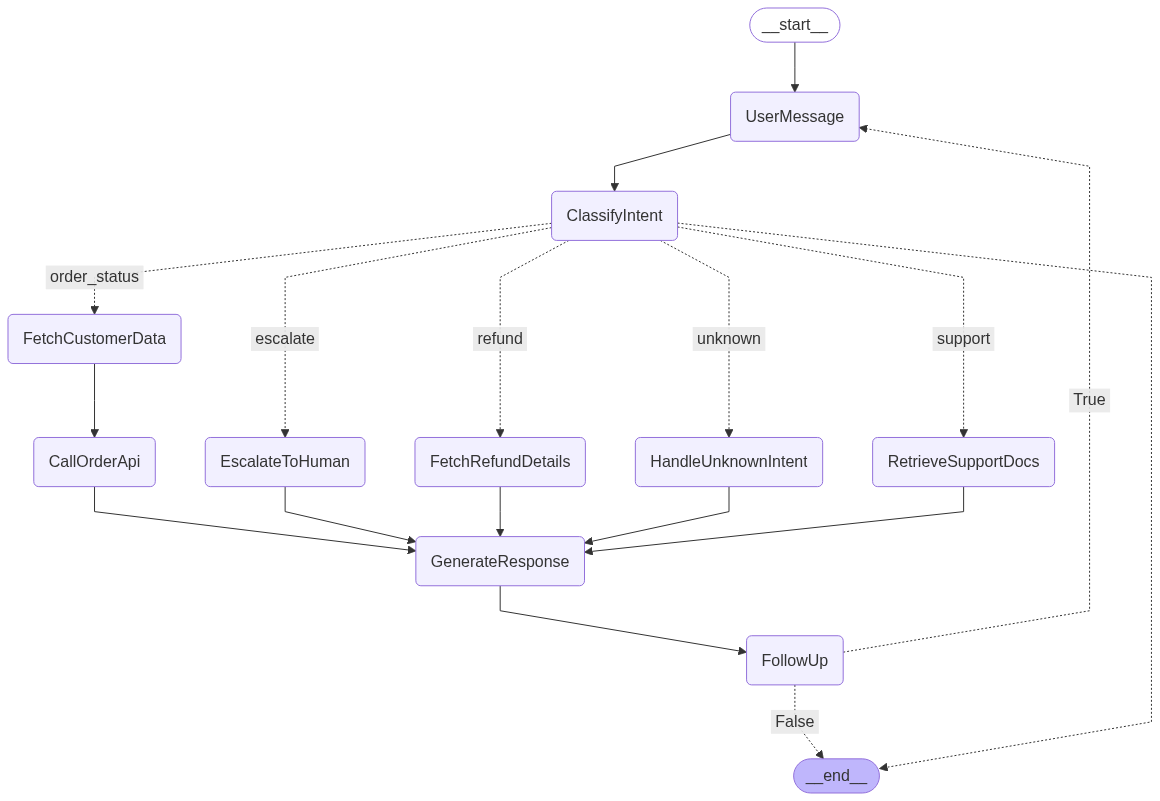

In [73]:

from IPython.display import Image, display
from langchain_core.runnables.graph_mermaid import draw_mermaid_png

display(
    Image(
        graph.get_graph().draw_mermaid_png(
        )
    )
)

In [74]:
# Example invocation
inputs = {
    "messages": [{"role": "user", "content": "Where is my order?"}]
}
result = graph.invoke(inputs)

print(result['response'])

Raw classifier output: '<think>
okay, so i've got this customer message to analyze: "where is my order?" and i need to classify it into one of four intents: order_status, refund, support, or escalate. let me break this down step by step.

first, i should understand what each intent category means. the order_status intent is for questions about tracking, delivery status, or shipment. refund is about returns, exchanges, or cancellations. support is for general help or policy questions, and escalate is when the customer wants to speak to a human or manager.

looking at the message, "where is my order?" is a question about the location or status of their order. it seems like the customer is trying to find out where their order is, which relates to tracking or delivery. so, this fits into the order_status category because they're asking about the current state of their order, not about returning it, asking for help with a policy, or wanting to escalate the issue to a human.

i don't think i